In [1]:
!pip install opencv-python numpy matplotlib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_shakiness(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        # Calculate dense optical flow
        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)

        dx = flow[..., 0]
        dy = flow[..., 1]

        # Compute average motion magnitude for the frame
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths here
shaky_video = r"C:\Users\simar\OneDrive\Desktop\Python_stabilization\DJI_20250411113208_0019_D.MP4"
stable_video = "19VSstabilized_output_full.mp4"

# Run analysis
shaky_mags = calculate_shakiness(shaky_video)
stable_mags = calculate_shakiness(stable_video)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0437
🔻 Motion reduction: 52.87%


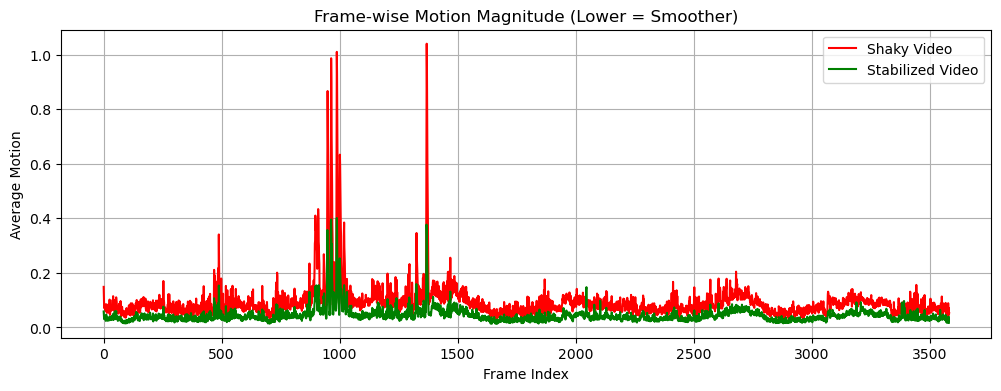

In [3]:


def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = r"C:\Users\simar\OneDrive\Desktop\Python_stabilization\DJI_20250411113208_0019_D.MP4"
stable_video = "19VSstabilized_output_full.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()



📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0437
🔻 Motion reduction: 52.87%


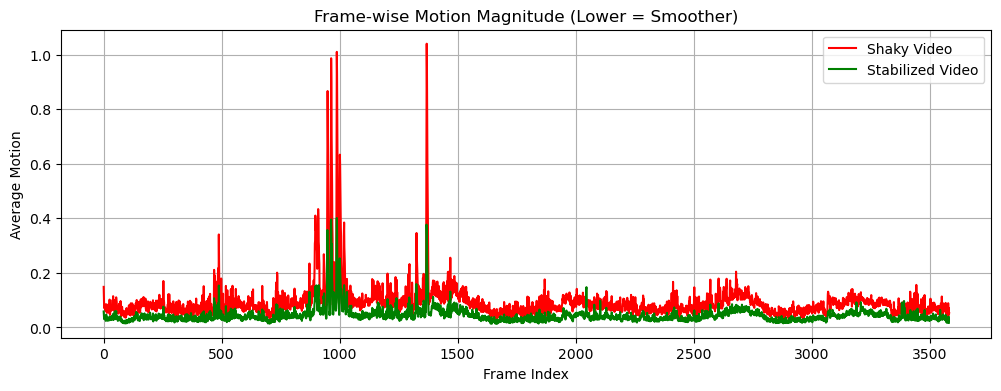

In [4]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = r"C:\Users\simar\OneDrive\Desktop\Python_stabilization\DJI_20250411113208_0019_D.MP4"
stable_video = "ORB19VSstabilized_output_full.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()


📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0430
🔻 Motion reduction: 53.62%


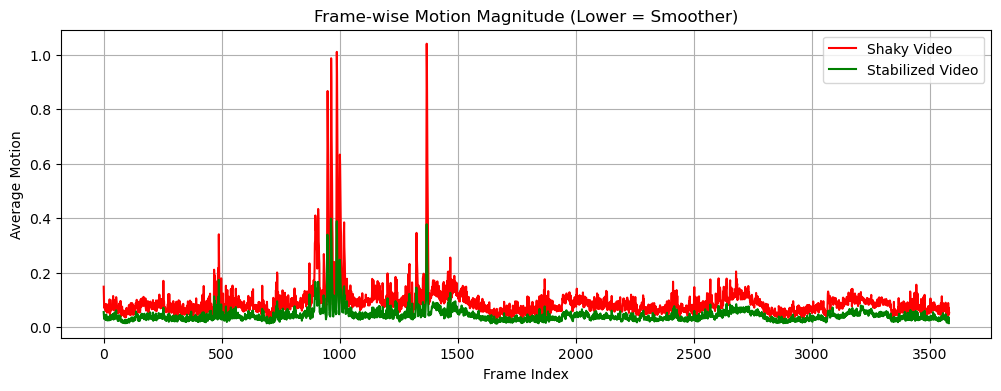

In [7]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = r"C:\Users\simar\OneDrive\Desktop\Python_stabilization\DJI_20250411113208_0019_D.MP4"
stable_video = "SIFT19VSstabilized_output_sift.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0556
🔻 Motion reduction: 39.98%


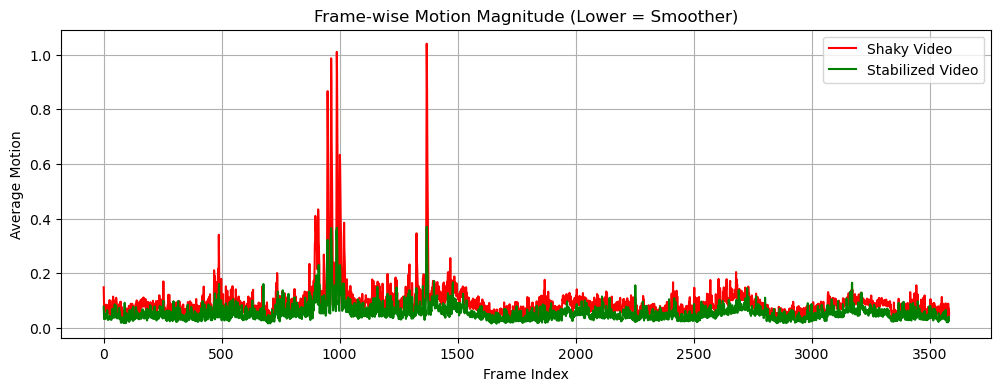

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = r"C:\Users\simar\OneDrive\Desktop\Python_stabilization\DJI_20250411113208_0019_D.MP4"
stable_video = "SIFT_RANSAC_Homography_L1_Stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0556
🔻 Motion reduction: 39.98%


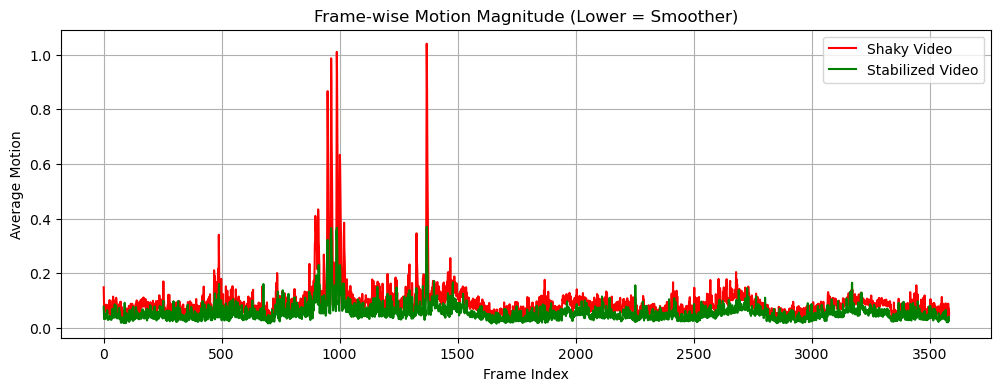

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = r"C:\Users\simar\OneDrive\Desktop\Python_stabilization\DJI_20250411113208_0019_D.MP4"
stable_video = "2SIFT_RANSAC_Homography_L1_Stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.1171
🔻 Motion reduction: -26.35%


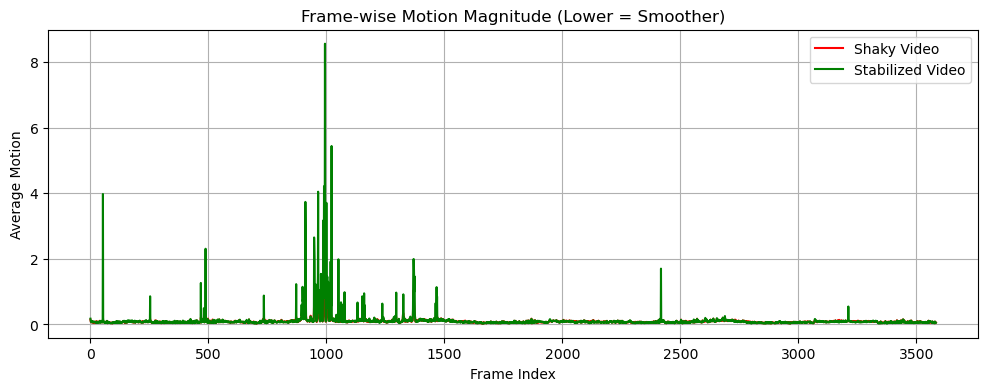

In [2]:

def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = " BlineORB_stabilized_output.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0401
🔻 Motion reduction: 56.75%


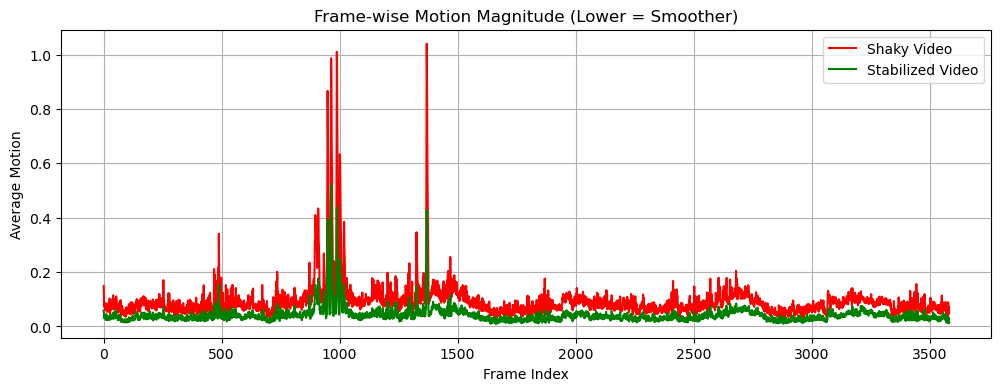

In [3]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "RegionBased_stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0450
🔻 Motion reduction: 51.45%


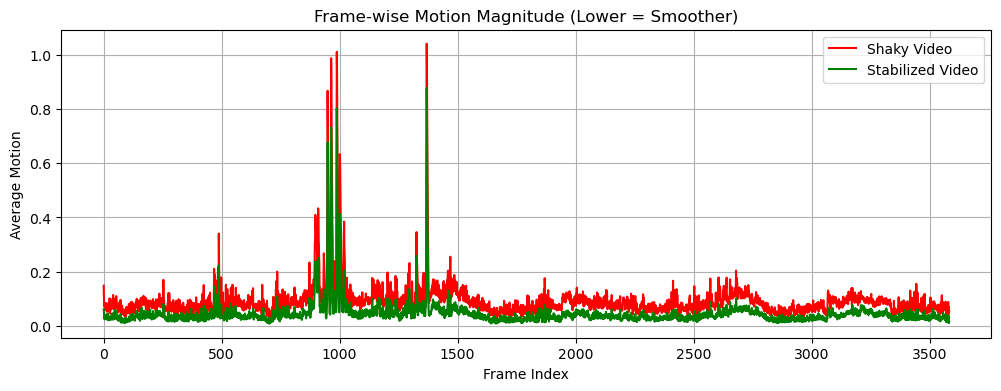

In [3]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "akaze_affine_from_frames_output.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0416
🔻 Motion reduction: 55.08%


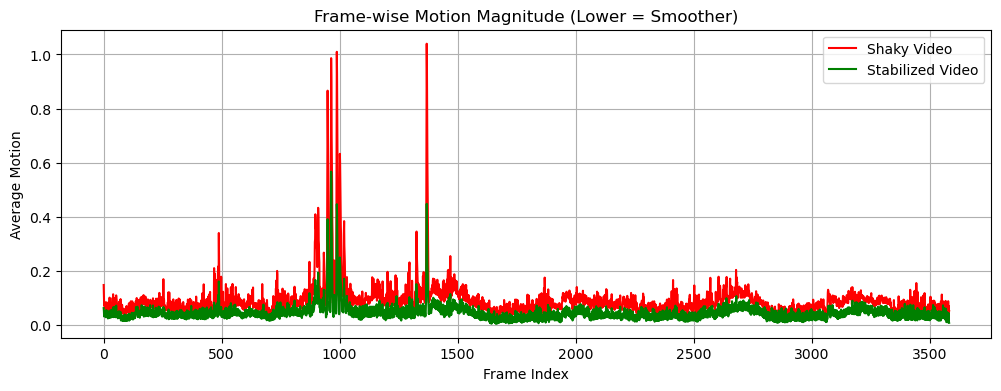

In [2]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "MultiPass_UltraStable.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0416
🔻 Motion reduction: 55.08%


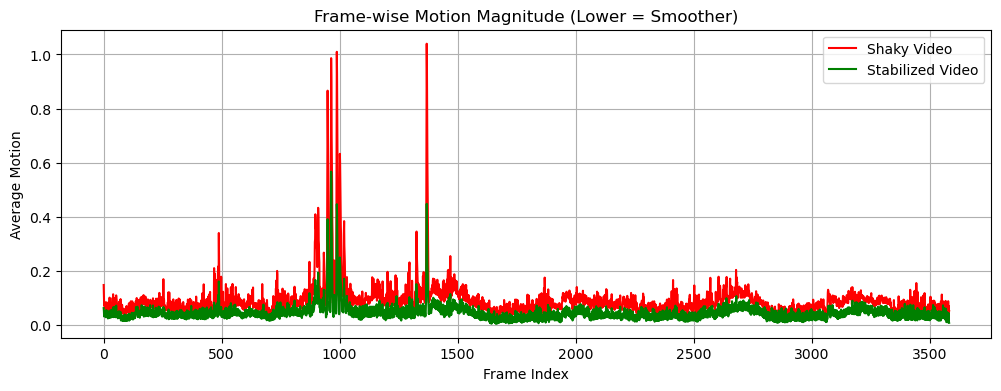

In [3]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "Triple_region.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0405
🔻 Motion reduction: 56.32%


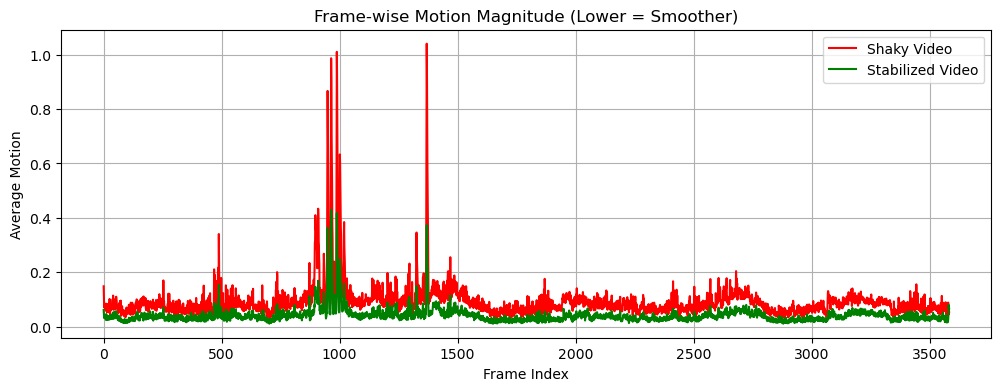

In [5]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "mesh_stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0428
🔻 Motion reduction: 53.78%


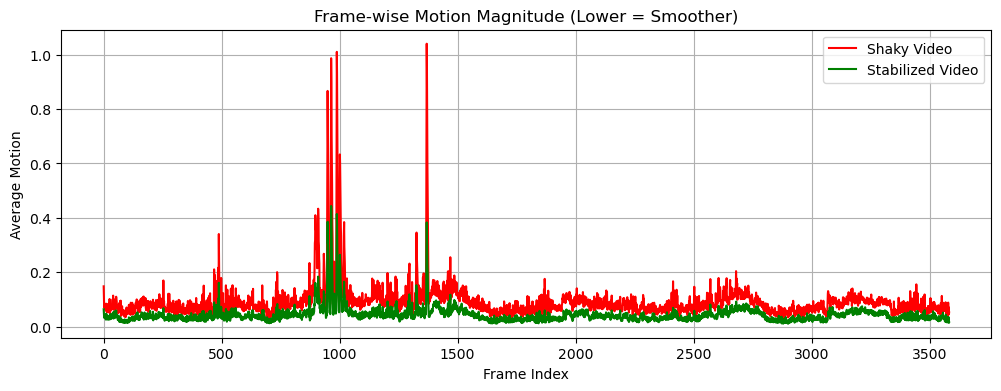

In [7]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "Optmal_mesh_stabilized_advanced.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0457
🔻 Motion reduction: 50.75%


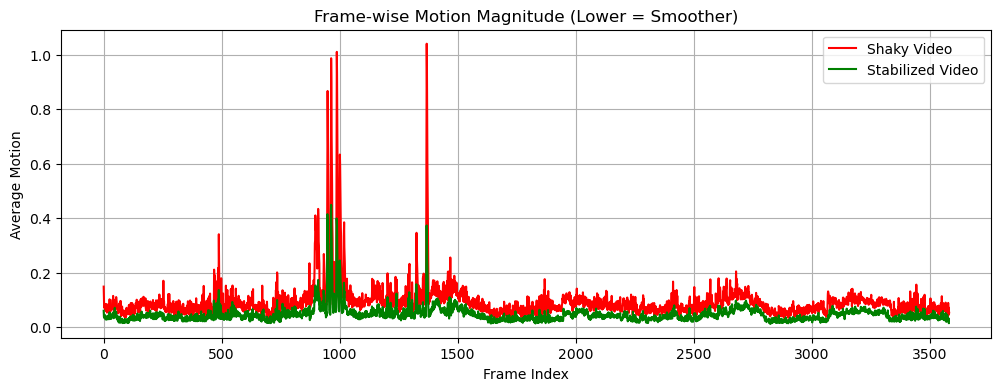

In [3]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "dual_plane_stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0409
🔻 Motion reduction: 55.92%


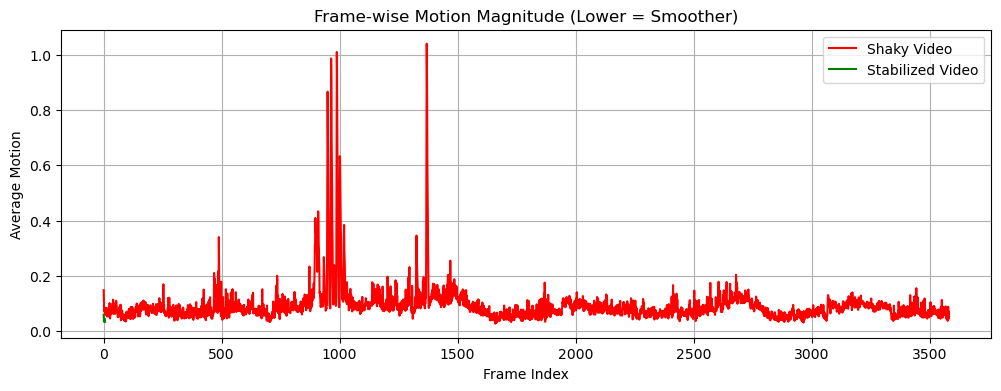

In [3]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "yolo+dual+mask_stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0475
🔻 Motion reduction: 48.80%


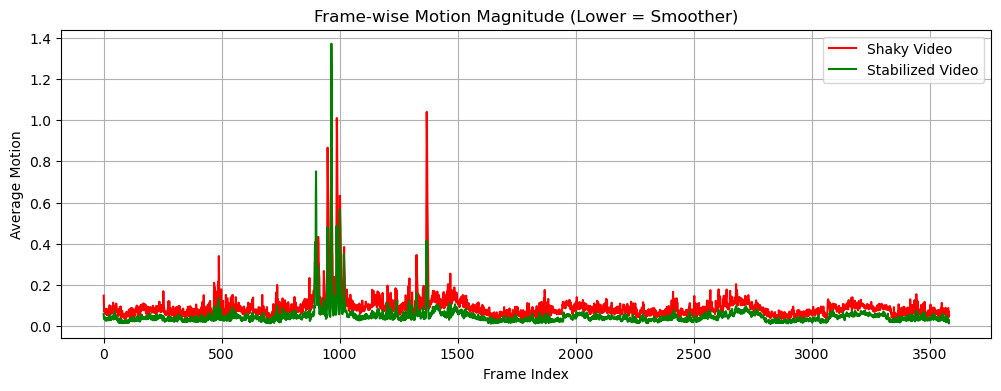

In [5]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "2_yolo+dual+mask.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

📹 Average frame motion (Shaky):     0.0927
📹 Average frame motion (Stabilized): 0.0401
🔻 Motion reduction: 56.75%


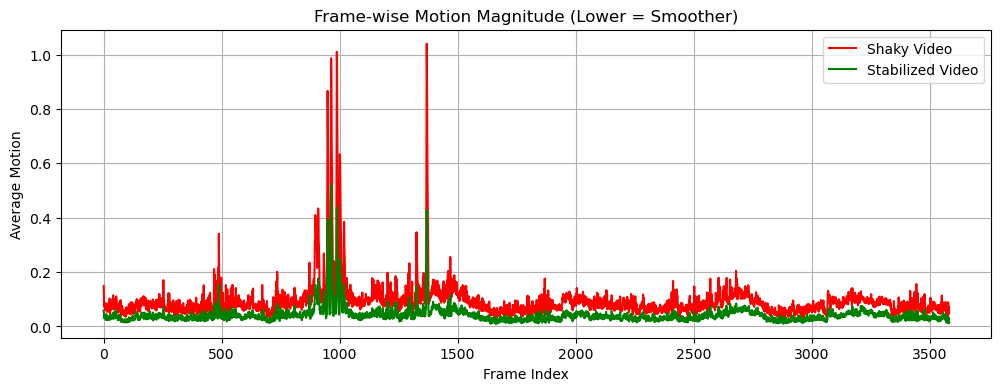

In [2]:
def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f"Error loading video: {video_path}")
        return []

    # Resize and convert first frame
    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes

# Set your video file paths
shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "count_RegionBased_stabilized.mp4"

# Analyze with resizing and skipping
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)

# Print results
avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"📹 Average frame motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Average frame motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion reduction: {reduction:.2f}%")

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(shaky_mags, label='Shaky Video', color='red')
plt.plot(stable_mags, label='Stabilized Video', color='green')
plt.title("Frame-wise Motion Magnitude (Lower = Smoother)")
plt.xlabel("Frame Index")
plt.ylabel("Average Motion")
plt.legend()
plt.grid(True)
plt.show()

 Analyzing shaky video...
Analyzing stabilized video...

📹 Avg Motion (Shaky):     0.0927
📹 Avg Motion (Stabilized): 0.0401
🔻 Motion Reduction: 56.75%



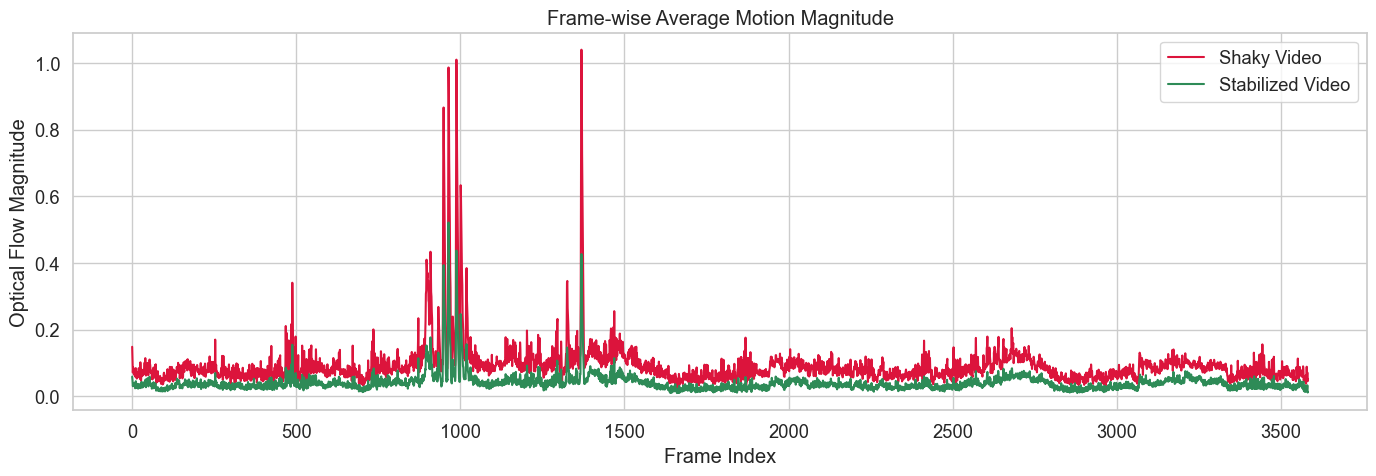

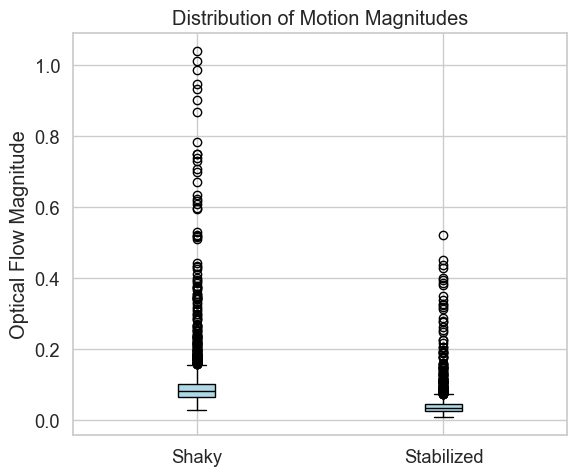

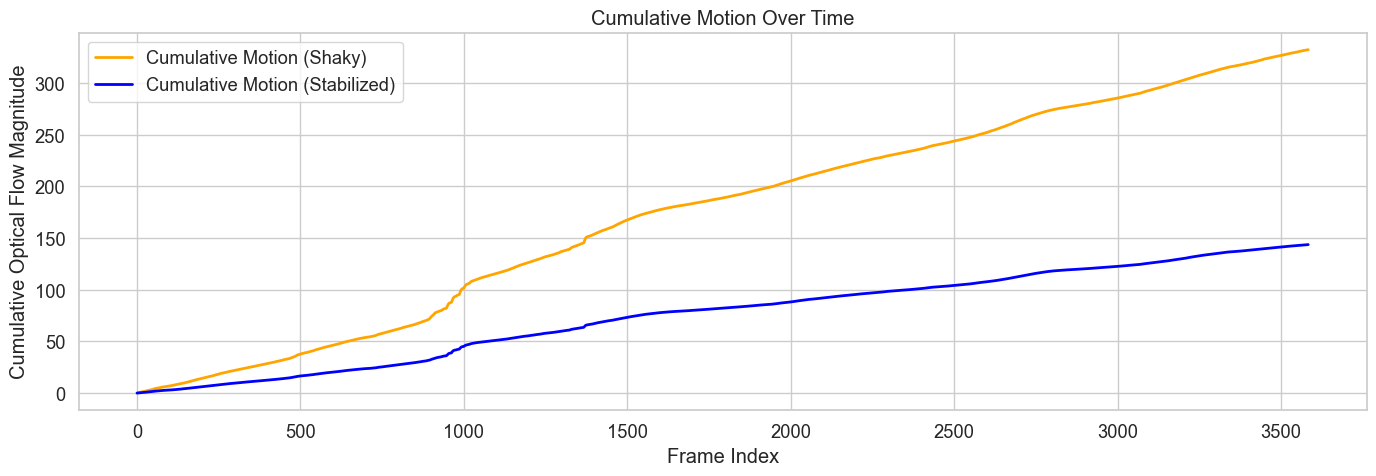

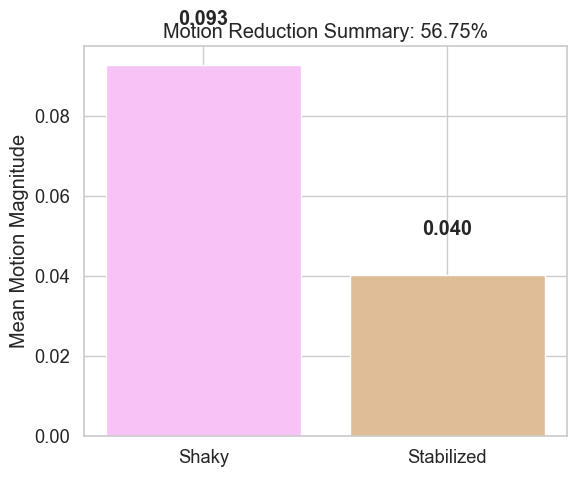

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.2)

def calculate_shakiness(video_path, scale=0.3, step=2):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    if not ret:
        print(f" Error loading video: {video_path}")
        return []

    prev_frame = cv2.resize(prev_frame, (0, 0), fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    magnitudes = []
    frame_index = 0

    while True:
        ret, curr_frame = cap.read()
        if not ret:
            break
        frame_index += 1
        if frame_index % step != 0:
            continue

        curr_frame = cv2.resize(curr_frame, (0, 0), fx=scale, fy=scale)
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray,
                                            None, 0.5, 3, 15, 3, 5, 1.2, 0)
        dx = flow[..., 0]
        dy = flow[..., 1]
        mag = np.sqrt(dx**2 + dy**2)
        avg_magnitude = np.mean(mag)
        magnitudes.append(avg_magnitude)

        prev_gray = curr_gray

    cap.release()
    return magnitudes


shaky_video = "DJI_20250411113208_0019_D.MP4"
stable_video = "count_RegionBased_stabilized.mp4"

print(" Analyzing shaky video...")
shaky_mags = calculate_shakiness(shaky_video, scale=0.3, step=2)
print("Analyzing stabilized video...")
stable_mags = calculate_shakiness(stable_video, scale=0.3, step=2)


avg_shaky = np.mean(shaky_mags)
avg_stable = np.mean(stable_mags)
reduction = 100 * (1 - avg_stable / avg_shaky)

print(f"\n📹 Avg Motion (Shaky):     {avg_shaky:.4f}")
print(f"📹 Avg Motion (Stabilized): {avg_stable:.4f}")
print(f"🔻 Motion Reduction: {reduction:.2f}%\n")


plt.figure(figsize=(14, 5))
plt.plot(shaky_mags, label='Shaky Video', color='crimson', linewidth=1.5)
plt.plot(stable_mags, label='Stabilized Video', color='seagreen', linewidth=1.5)
plt.title("Frame-wise Average Motion Magnitude")
plt.xlabel("Frame Index")
plt.ylabel("Optical Flow Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
plt.boxplot([shaky_mags, stable_mags], labels=["Shaky", "Stabilized"], patch_artist=True,
            boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title("Distribution of Motion Magnitudes")
plt.ylabel("Optical Flow Magnitude")
plt.tight_layout()
plt.show()


cum_shaky = np.cumsum(shaky_mags)
cum_stable = np.cumsum(stable_mags)

plt.figure(figsize=(14, 5))
plt.plot(cum_shaky, label='Cumulative Motion (Shaky)', color='orange', linewidth=2)
plt.plot(cum_stable, label='Cumulative Motion (Stabilized)', color='blue', linewidth=2)
plt.title("Cumulative Motion Over Time")
plt.xlabel("Frame Index")
plt.ylabel("Cumulative Optical Flow Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
bars = plt.bar(['Shaky', 'Stabilized'], [avg_shaky, avg_stable], color=['#f7c3f7', '#debd97'])
plt.title(f"Motion Reduction Summary: {reduction:.2f}%")
plt.ylabel("Mean Motion Magnitude")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.3f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()